# CogRbob Skill Diagram

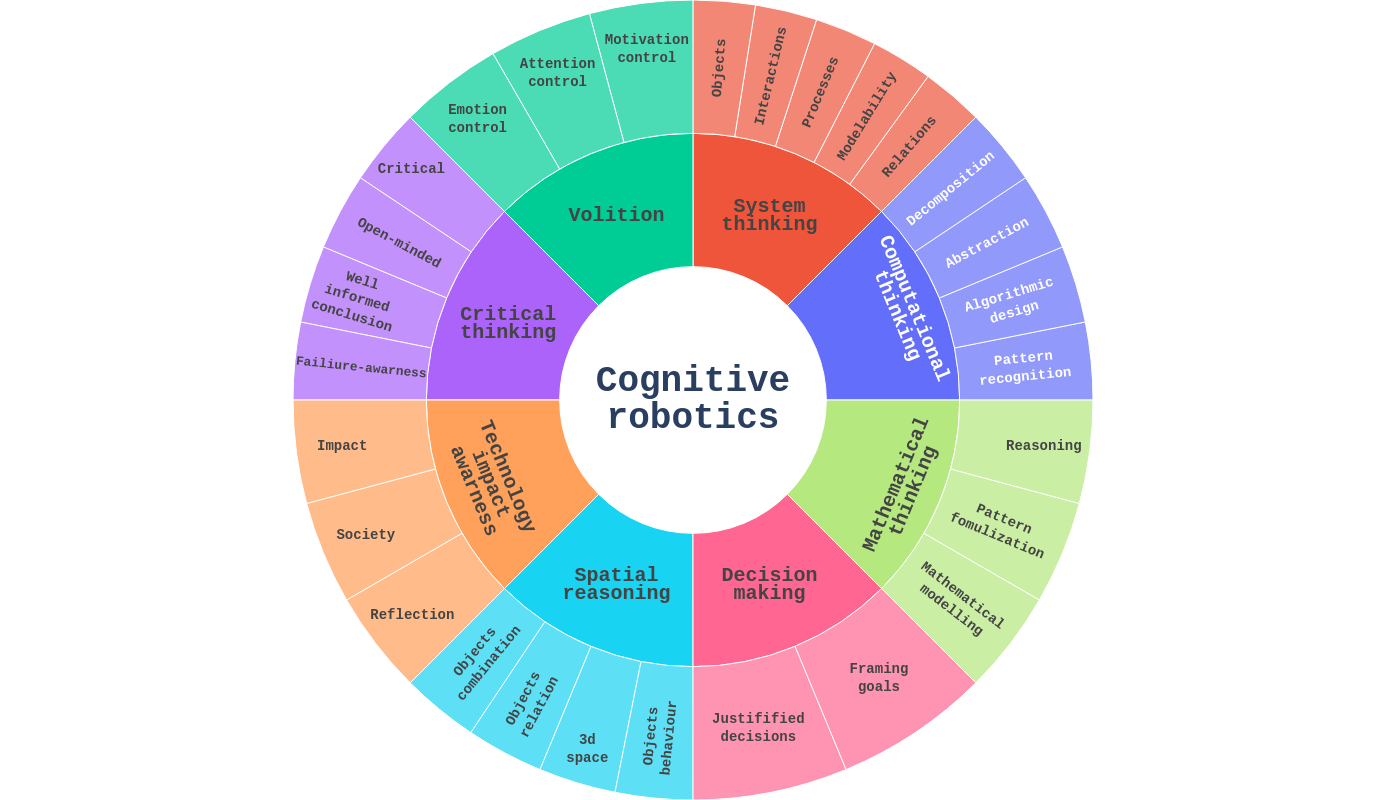

'cog_skill.html'

In [86]:
import plotly.express as px
import plotly.offline as poffline
import pandas as pd
import math

# Sample hierarchical data
data_obj = {
    'Cognitive Robotics': {
        "Mathematical Thinking": ['reasoning', 'pattern fomulization', 'mathematical modelling'],
        "Decision Making": ['framing goals', 'justifified decisions'],
        "Spatial Reasoning": ['objects behaviour', '3D Space', 'objects relation', 'objects combination'],
        "Technology impact awarness": ['reflection', 'society', 'impact'],
        'Critical Thinking': ['failiure-awarness', 'well informed conclusion', 'open-minded', 'critical'],
        "Volition": ['emotion control', 'attention control', 'motivation control'],
        "System Thinking" : ['objects', 'interactions', 'processes', 'modelability', 'relations'],
        "Computational Thinking": ['decomposition', 'abstraction', 'algorithmic design', 'pattern recognition'],
    }
}

data = {
    'Topic': [],
    'Skill': [],
    'Competences': [],
    'Values': []
}

lcm = math.lcm(*[len(data_obj['Cognitive Robotics'][i]) for i in data_obj['Cognitive Robotics']])
count_topic = 1

# convert object data to table format
for topic in data_obj:
    for skill in data_obj[topic]:
        # to make the skills have the same size
        competences_len = len(data_obj[topic][skill])
        # to make the skills display orderly
        value = lcm / competences_len + (count_topic / competences_len) * 0.001
        count_topic += 1
        for competences in data_obj[topic][skill]:
            data['Topic'].append(topic)
            data['Skill'].append(skill)
            data['Competences'].append(competences)
            data['Values'].append(value + data_obj[topic][skill].index(competences) * 0.0001)
            
df = pd.DataFrame(data)

# Inject custom label style
df_style = df.copy()
df_style['Topic'] = df['Topic'].apply(lambda x: f'<span style="font-size:36px;">{x.capitalize().replace(" ", "<br><br>")}</span>')
df_style['Skill'] = df['Skill'].apply(lambda x: f'<span style="font-size:20px;">{x.capitalize().replace(" ", "<br>")}</span>')
df_style['Competences'] = df['Competences'].apply(lambda x: f'<a href="https://ai.uni-bremen.de/" style="color:inherit;">{x.capitalize().replace(" ", "<br>")}</a>')

# Create sunburst chart
fig = px.sunburst(df_style, path=['Topic', 'Skill', 'Competences'],
                  values='Values', )
# Style of chart
fig.update_layout(
    hovermode=False,
    # autosize=True,
    # width=800,
    height=800,
    margin = dict(t=0, l=0, r=0, b=0),
    font=dict(
        family="Courier New, monospace",
        size=14,
        weight='bold'
    )
)
fig.show()

poffline.plot(fig, filename='cog_skill.html')

In [87]:
df

,Topic,Skill,Competences,Values
0,Cognitive Robotics,Mathematical Thinking,reasoning,20.000333
1,Cognitive Robotics,Mathematical Thinking,pattern fomulization,20.000433
2,Cognitive Robotics,Mathematical Thinking,mathematical modelling,20.000533
3,Cognitive Robotics,Decision Making,framing goals,30.001000
4,Cognitive Robotics,Decision Making,justifified decisions,30.001100
5,Cognitive Robotics,Spatial Reasoning,objects behaviour,15.000750
6,Cognitive Robotics,Spatial Reasoning,3D Space,15.000850
7,Cognitive Robotics,Spatial Reasoning,objects relation,15.000950
8,Cognitive Robotics,Spatial Reasoning,objects combination,15.001050
9,Cognitive Robotics,Technology impact awarness,reflection,20.001333
